In [0]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [0]:
df = pd.read_csv('/content/drive/Shared drives/257 Project/US_Accidents_May19.csv')

In [0]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 49 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi

In [0]:
df.nunique()

ID                       2243939
Source                         3
TMC                           21
Severity                       5
Start_Time               2086185
End_Time                 2079472
Start_Lat                 770318
Start_Lng                 755511
End_Lat                   219390
End_Lng                   221979
Distance(mi)               11972
Description              1253507
Number                     32326
Street                    136834
Side                           3
City                       11077
County                      1682
State                         49
Zipcode                   297430
Country                        1
Timezone                       4
Airport_Code                1895
Weather_Timestamp         363617
Temperature(F)               768
Wind_Chill(F)                899
Humidity(%)                   97
Pressure(in)                 310
Visibility(mi)                67
Wind_Direction                18
Wind_Speed(mph)               88
Precipitat

In [0]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


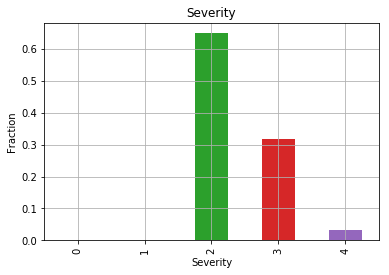

In [0]:
df.Severity.value_counts(normalize=True).sort_index().plot.bar()
plt.grid()
plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Fraction');

In [0]:
bool_cols = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
booldf = df[bool_cols]
not_one_hot = booldf[booldf.sum(axis=1) > 1]
print('There are {} non one hot metadata rows, which are {:.1f}% of the data'.format(len(not_one_hot),100*len(not_one_hot)/len(df)))

There are 134798 non one hot metadata rows, which are 6.0% of the data


In [0]:
bools = booldf.sum(axis=0)

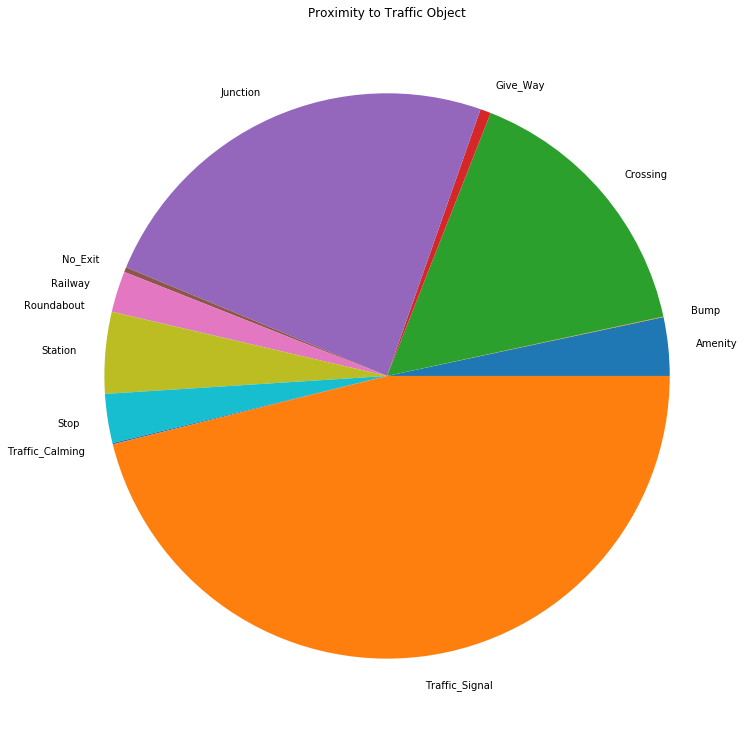

In [0]:
bools.plot.pie(figsize=(13,13))
plt.ylabel('')
plt.title('Proximity to Traffic Object');

In [0]:
st = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')

top 20 accident durations correspond to 96.1% of the data


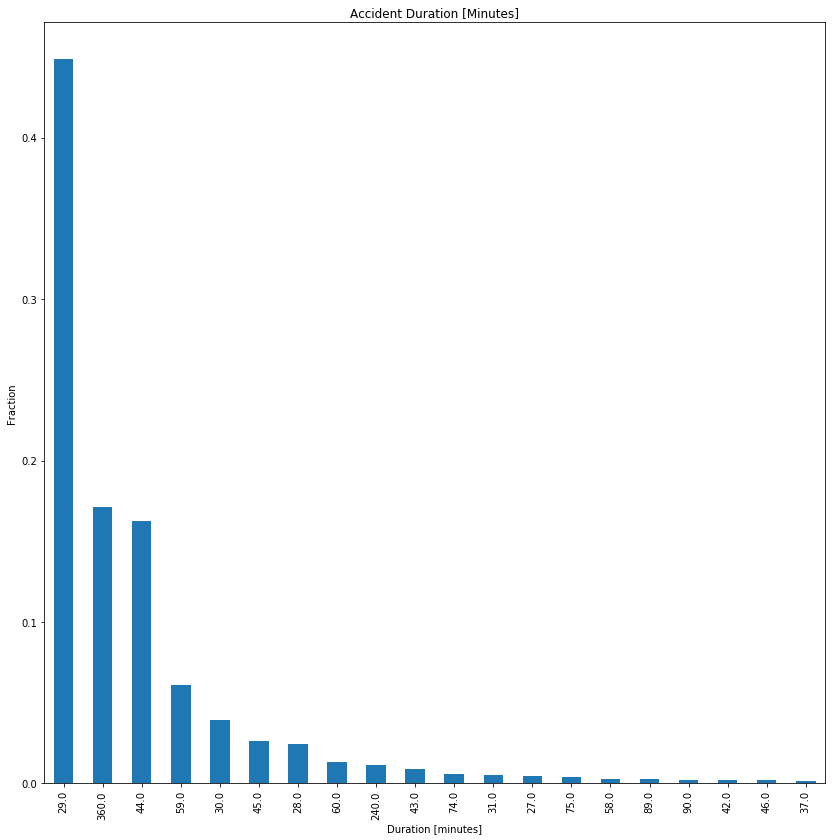

In [0]:
diff = (end-st)
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(14,14))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction');

In [0]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df = df.set_index('time')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 06:07:59,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:49:27,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
2016-02-08 07:23:34,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
2016-02-08 07:39:07,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


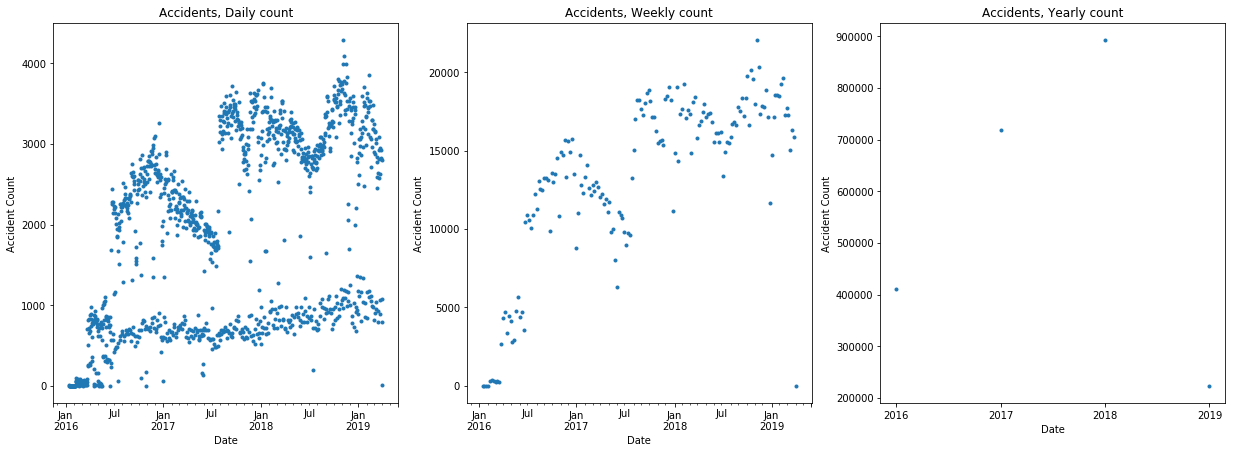

In [0]:
freq_text = {'D':'Daily','W':'Weekly','Y':'Yearly'}
plt.subplots(1,3,figsize=(21,7))
for i, (fr,text) in enumerate(freq_text.items(),1):
    plt.subplot(1,3,i)
    sample = df.ID['2016':].resample(fr).count()
    sample.plot(style='.')
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

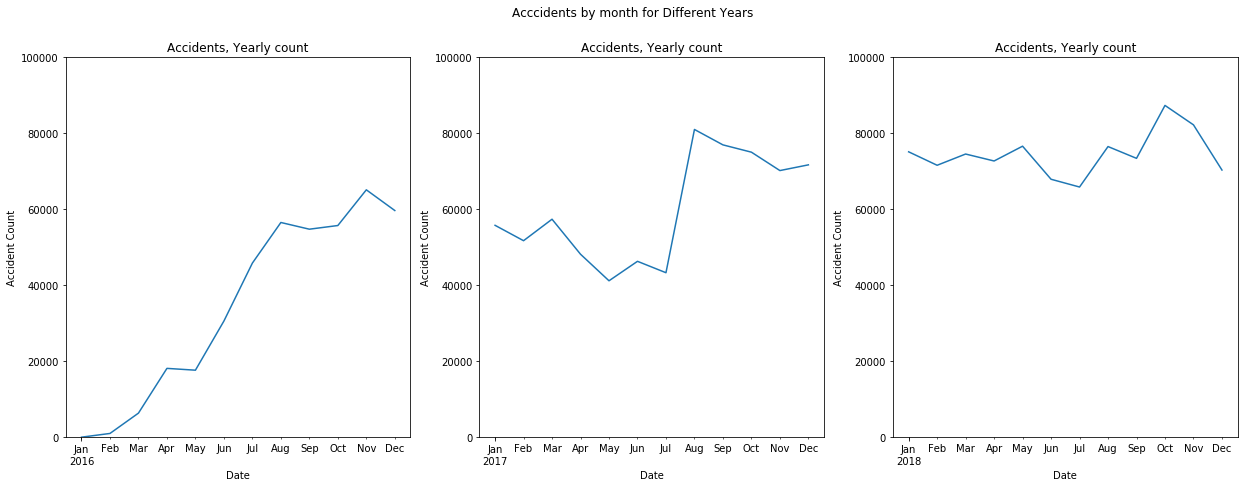

In [0]:
years = ['2016','2017','2018']
fig, _ = plt.subplots(1,3,figsize=(21,7), sharex='all', sharey='all')

fig.suptitle('Acccidents by month for Different Years')
plt.xlabel('month')
plt.ylabel('Accidents')
for i, year in enumerate(years,1):
    plt.subplot(1,3,i)
    sample = df.loc[year].ID.resample('M').count()
    sample.plot()
    plt.ylim(0,100000)
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

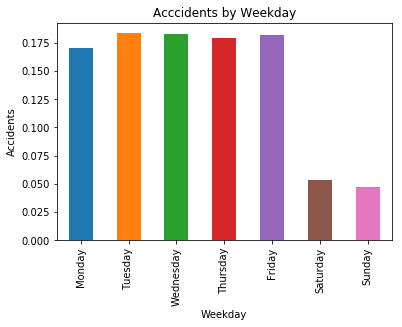

In [0]:
df['Weekday'] = df.index.weekday_name
weekday = df.groupby('Weekday').ID.count()
weekday = weekday/weekday.sum()
dayOfWeek=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday[dayOfWeek].plot.bar()
plt.title('Acccidents by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Accidents');

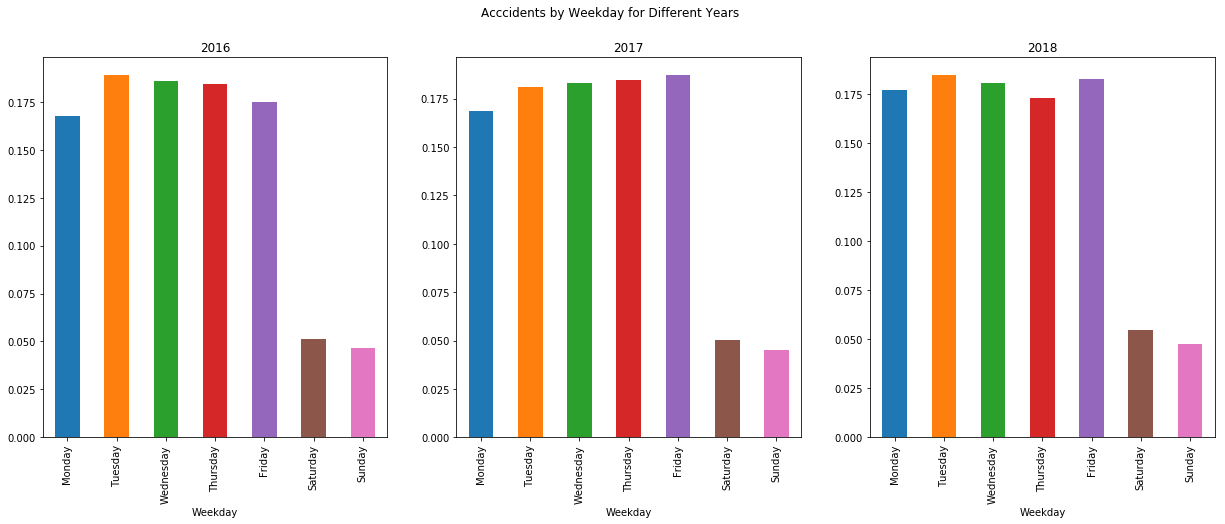

In [0]:
years = ['2016','2017','2018']
fig, _ = plt.subplots(1,3,figsize=(21,7), sharex='all', sharey='all')

fig.suptitle('Acccidents by Weekday for Different Years')
plt.xlabel('Weekday')
plt.ylabel('Accidents')
for i, year in enumerate(years,1):
    weekday = df.loc[year].groupby('Weekday').ID.count()
    weekday = weekday/weekday.sum()
    dayOfWeek=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    plt.subplot(1,3,i)
    plt.title(year)
    weekday[dayOfWeek].plot.bar()

In [0]:
import folium
sdf = df.sample(10000)
m = folium.Map(location=[sdf.Start_Lat.mean(),sdf.Start_Lng.mean()], zoom_start=4,tiles="CartoDB dark_matter")
sdf.apply(lambda row:folium.CircleMarker(location=[row["Start_Lat"], row["Start_Lng"]],radius=1).add_to(m), axis=1)
m.save('./map.html')

ModuleNotFoundError: No module named 'folium'

In [0]:
from IPython.display import FileLink
print("The following is a map of 10000 accidents")
FileLink(r'map.html')

The following is a map of 10000 accidents


/content/map.html

In [0]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix, fontsize=15')
    plt.show()

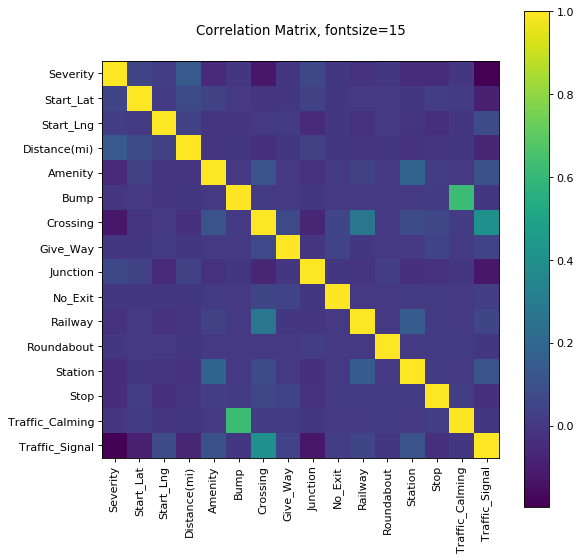

In [0]:
plotCorrelationMatrix(df, 8)

In [0]:
df1 = df

In [0]:
df1.isnull().sum()

ID                             0
Source                         0
TMC                       516762
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1727177
End_Lng                  1727177
Distance(mi)                   0
Description                    1
Number                   1458402
Street                         0
Side                           0
City                          68
County                         0
State                          0
Zipcode                      646
Country                        0
Timezone                    2141
Airport_Code               23664
Weather_Timestamp          47170
Temperature(F)             62265
Wind_Chill(F)            1852370
Humidity(%)                64467
Pressure(in)               57280
Visibility(mi)             71360
Wind_Direction             47190
Wind_Speed(mph)           442954
Precipitat

In [0]:
df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weekday
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,Monday
2016-02-08 06:07:59,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Day,Monday
2016-02-08 06:49:27,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,True,False,Night,Night,Day,Day,Monday
2016-02-08 07:23:34,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,Night,Day,Day,Day,Monday
2016-02-08 07:39:07,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,True,False,Day,Day,Day,Day,Monday


In [0]:
df1 = df1.drop(['Distance(mi)', 'TMC', 'Country', 'Description', 'City', 'County', 'Street', 'Side', 'Zipcode', 'State', 'Airport_Code', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)

In [0]:
df1.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Number,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weekday
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,Night,Monday
2016-02-08 06:07:59,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,2584.0,...,False,False,False,False,False,False,False,False,Night,Monday
2016-02-08 06:49:27,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,Night,Monday
2016-02-08 07:23:34,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,Night,Monday
2016-02-08 07:39:07,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,NaN,...,False,False,False,False,False,False,True,False,Day,Monday


In [0]:
cols = ["End_Lat", "End_Lng", "Number"]
df1 = df1.drop(cols, axis=1)

In [0]:
df1.isnull().sum()

ID                         0
Source                     0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
Timezone                2141
Weather_Timestamp      47170
Temperature(F)         62265
Wind_Chill(F)        1852370
Humidity(%)            64467
Pressure(in)           57280
Visibility(mi)         71360
Wind_Direction         47190
Wind_Speed(mph)       442954
Precipitation(in)    1979466
Weather_Condition      72004
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Turning_Loop               0
Sunrise_Sunset            78
Weekday                    0
dtype: int64

In [0]:
pmean = df1['Pressure(in)'].mean()
tmean = df1['Temperature(F)'].mean()
wcmean = df1['Wind_Chill(F)'].mean()
hmean = df1['Humidity(%)'].mean()
wsmean = df1['Wind_Speed(mph)'].mean()
prmean = df1['Precipitation(in)'].mean()

In [0]:
df1['Pressure(in)']=df1['Pressure(in)'].fillna(pmean)

In [0]:
df1['Temperature(F)'] = df1['Temperature(F)'].fillna(tmean)

In [0]:
df1['Wind_Chill(F)'] = df1['Wind_Chill(F)'].fillna(wcmean)

In [0]:
df1['Humidity(%)'] = df1['Humidity(%)'].fillna(hmean)

In [0]:
df1['Wind_Speed(mph)'] = df1['Wind_Speed(mph)'].fillna(wsmean)

In [0]:
df1['Precipitation(in)']=df1['Precipitation(in)'].fillna(prmean)

In [0]:
df1.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Timezone              2141
Weather_Timestamp    47170
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)       71360
Wind_Direction       47190
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition    72004
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset          78
Weekday                  0
dtype: int64

In [0]:
df1.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Timezone', 'Weather_Timestamp', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Weekday'],
      dtype='object')

In [0]:
visMode = df1["Visibility(mi)"].mode()
#df1["Visibility(mi)"]=df1["Visibility(mi)"].fillna(visMode)

In [0]:
#df1["Visibility(mi)"]=df1["Visibility(mi)"].fillna(visMode)
df1['Visibility(mi)'] = df1['Visibility(mi)'].fillna(df1['Visibility(mi)'].mode()[0])
df1['Wind_Direction'] = df1['Wind_Direction'].fillna(df1['Wind_Direction'].mode()[0])
df1['Weather_Condition'] = df1['Weather_Condition'].fillna(df1['Weather_Condition'].mode()[0])
df1['Sunrise_Sunset'] = df1['Sunrise_Sunset'].fillna(df1['Sunrise_Sunset'].mode()[0])

In [0]:
df1.drop(['Timezone','Weather_Timestamp', 'Start_Time', 'End_Time', 'ID', 'Source'], axis = 1, inplace = True)

In [0]:
df1.dropna(axis=0, inplace=True)

In [0]:
df1.isnull().sum()

ID                   0
Source               0
Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
Weekday              0
dtype: int64

In [0]:
df1.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Weekday'],
      dtype='object')

In [0]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Amenity'] = label_encoder.fit_transform(df1['Amenity'])
df1['Bump'] = label_encoder.fit_transform(df1['Bump'])
df1['Crossing'] = label_encoder.fit_transform(df1['Crossing'])
df1['Give_Way'] = label_encoder.fit_transform(df1['Give_Way'])
df1['Junction'] = label_encoder.fit_transform(df1['Junction'])
df1['No_Exit'] = label_encoder.fit_transform(df1['No_Exit'])
df1['Railway'] = label_encoder.fit_transform(df1['Railway'])
df1['Roundabout'] = label_encoder.fit_transform(df1['Roundabout'])
df1['Station'] = label_encoder.fit_transform(df1['Station'])
df1['Stop'] = label_encoder.fit_transform(df1['Stop'])
df1['Traffic_Calming'] = label_encoder.fit_transform(df1['Traffic_Calming'])
df1['Traffic_Signal'] = label_encoder.fit_transform(df1['Traffic_Signal'])
df1['Turning_Loop'] = label_encoder.fit_transform(df1['Turning_Loop'])
df1.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weekday
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,36.9,26.042067,91.0,...,0,0,0,0,0,0,0,0,Night,Monday
2016-02-08 06:07:59,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,37.9,26.042067,100.0,...,0,0,0,0,0,0,0,0,Night,Monday
2016-02-08 06:49:27,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,36.0,33.300000,100.0,...,0,0,0,0,0,0,1,0,Night,Monday
2016-02-08 07:23:34,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,35.1,31.000000,96.0,...,0,0,0,0,0,0,0,0,Night,Monday
2016-02-08 07:39:07,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,36.0,33.300000,89.0,...,0,0,0,0,0,0,1,0,Day,Monday


In [0]:
df1['Sunrise_Sunset'] = label_encoder.fit_transform(df1['Sunrise_Sunset'])
df1['Weather_Condition'] = label_encoder.fit_transform(df1['Weather_Condition'])
df1['Wind_Direction'] = label_encoder.fit_transform(df1['Wind_Direction'])
df1['Weekday'] = label_encoder.fit_transform(df1['Weekday'])
df1.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weekday
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,36.9,26.042067,91.0,29.68,10.0,...,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:07:59,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,37.9,26.042067,100.0,29.65,10.0,...,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:49:27,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,36.0,33.300000,100.0,29.67,10.0,...,0,0,0,0,0,0,1,0,1,1
2016-02-08 07:23:34,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,35.1,31.000000,96.0,29.64,9.0,...,0,0,0,0,0,0,0,0,1,1
2016-02-08 07:39:07,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,36.0,33.300000,89.0,29.65,6.0,...,0,0,0,0,0,0,1,0,0,1


In [0]:
Y = df1['Severity']

In [0]:
X = df1.drop(['Severity'], axis = 1)


In [0]:
X.head()

,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weekday
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,39.865147,-84.058723,36.9,26.042067,91.0,29.68,10.0,0,8.844042,0.020000,...,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:07:59,39.928059,-82.831184,37.9,26.042067,100.0,29.65,10.0,0,8.844042,0.000000,...,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:49:27,39.063148,-84.032608,36.0,33.300000,100.0,29.67,10.0,12,3.500000,0.060439,...,0,0,0,0,0,0,1,0,1,1
2016-02-08 07:23:34,39.747753,-84.205582,35.1,31.000000,96.0,29.64,9.0,12,4.600000,0.060439,...,0,0,0,0,0,0,0,0,1,1
2016-02-08 07:39:07,39.627781,-84.188354,36.0,33.300000,89.0,29.65,6.0,12,3.500000,0.060439,...,0,0,0,0,0,0,1,0,0,1


In [0]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(X)
train_img = pca.transform(X)
train = pd.DataFrame(train_img)
train.head()

,0,1,2,3,4
0,-34.773736,11.735276,6.781417,-0.620661,-6.477886
1,-41.709523,12.330423,2.635254,3.503899,-5.785406
2,-46.052493,4.174591,3.223780,-3.219133,0.826185
3,-42.950404,5.021386,5.669023,-4.788676,1.684763
4,-37.187944,3.402638,8.552177,-6.317802,0.255038


In [0]:
train.shape

(2243939, 5)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, Y, test_size=0.2, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
transform = scaler.transform(X_train)
#test_img = scaler.transform(test_img)
scalar_train = pd.DataFrame(transform)
scalar_train.head()

,0,1,2,3,4
0,0.742105,0.755816,-1.602999,0.235361,1.534765
1,0.662047,0.608165,1.020950,1.235185,-1.082218
2,-1.243870,0.398756,0.356451,0.095890,0.138656
3,0.539454,1.960576,2.118923,-1.301455,2.387827
4,0.038454,0.339216,-0.741005,2.235387,0.408046


In [0]:
from sklearn.preprocessing import StandardScaler
scalert = StandardScaler()
# Fit on training set only.
scalert.fit(X_test)
# Apply transform to both the training set and the test set.
transformt = scalert.transform(X_test)
#test_img = scaler.transform(test_img)
scalar_test = pd.DataFrame(transformt)